In [1]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

from grover import create_circuit, implement_grover, simulate_all_and_extract, optimal_grover_iterations
from math import ceil, log2

In [2]:
n = 3
k = ceil(log2(n))
grid = [0]*n*n*k

print(grid)

qc, qr, idx = create_circuit(grid, n)


# Prepare uniform superposition on data qubits
data_qubits = [qr[idx.data(i, j, b)]
               for i in range(n)
               for j in range(n)
               for b in range(idx.k)]
for q in data_qubits:
    qc.h(q)

print("Total number of qubits : ", qc.num_qubits)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Total number of qubits :  29


In [ ]:
# Append r Grover 
num_sol = [2, 12, 576, 161280, 812851200]
r = optimal_grover_iterations(n,num_sol[n-2])
r=1
print("Optimal number of iterations : ", r)
implement_grover(qc, qr, idx, iterations=r)
results = simulate_all_and_extract(qc, qr, idx, 'statevector', shots=1)

# print a nice table
grid_counts = {}
for grid, cnt in results.items():
    print(f"grid={grid},  → {cnt}")
    grid_counts[tuple(grid)] = grid_counts.get(tuple(grid), 0) + cnt


Optimal number of iterations :  1


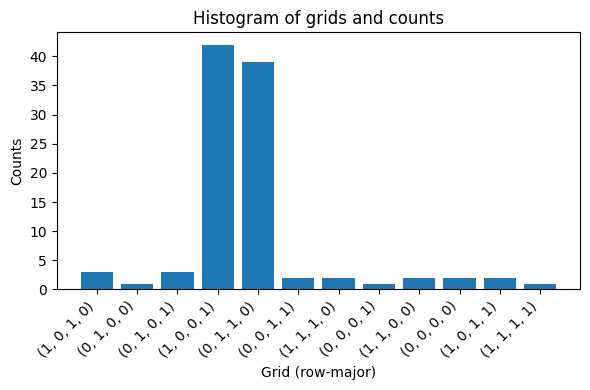

In [ ]:
import matplotlib.pyplot as plt

labels = [str(grid) for grid in grid_counts]
values = list(grid_counts.values())

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.xlabel('Grid (row-major)')
plt.ylabel('Counts')
plt.title('Histogram of grids and counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
